In [174]:
from jax import grad
import numpy as np
import matplotlib.pyplot as plt
from jax import random
import io

In [175]:
# def sigmoid(X):
#     return X * (X > 0)

def sigmoid(X):
    return 1./(1 + np.exp(-X))

def add_bias(X):
    return np.concatenate([np.ones((X.shape[0],1)), X], axis=1)

jax_key = random.PRNGKey(0)

def one_layer_init(input_size, output_size):
    return random.uniform(key=jax_key, shape=(output_size, input_size + 1), minval=-3, maxval=3)

def compute_layer(A_j, Theta_j):
    z = np.dot(A_j, Theta_j.T)
    return sigmoid(z)

def n_layer_init(layer_sizes):
    weights = []
    for l_idx in range(len(layer_sizes)-1):
        weights.append( one_layer_init(input_size=layer_sizes[l_idx], output_size=layer_sizes[l_idx+1]) )
    return weights

def forward_prop(X, Thetas):
    A0 = add_bias(X)
    outputs = [A0]
    for theta in Thetas[:-1]:
        A = compute_layer(outputs[-1], theta)
        outputs.append( add_bias(A) )
    return outputs + [compute_layer(outputs[-1], Thetas[-1])]

def cost_function(A, Y):
    return -np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))

def output_delta(A_j, Y):
    return A_j - Y

def weight_update(A_j, Delta_next, Theta_j, rate):
    return Theta_j - rate * np.dot(Delta_next.T, A_j)

def hidden_delta(A_j, Delta_next, Theta_j):
    return A_j * (1-A_j) * np.dot(Delta_next, Theta_j)

def optimization_objective(Thetas, X, Y):

    Y_hat = forward_prop(X, Thetas)[-1]
    return cost_function(Y_hat, Y)

def test_function(x, w, a=5):
    return np.dot(x**a, w)

def my_derivative(x, w, a=5):

    return a * x**(a-1) * w


jax_derivative = grad(test_function)


def two_layer_training(X, Y, Thetas, iters=500, rate=0.5):
    ### YOUR SOLUTION HERE
    cost_per_iter = []
    for i in range(iters):
        # compute hidden layers
        A = forward_prop(X, Thetas)

        # update Theta_1
        # GRADING NOTE: 1 pt here
        delta = output_delta(A[-1], Y)
        Thetas[-1] = weight_update(A[-2], delta, Thetas[-1], rate=rate)

        # update Theta_0
        # GRADING NOTE: 1 pt here
        delta = hidden_delta(A[-2], delta, Thetas[-1])
        # remove dimension corresponding to bias
        delta = delta[:, 1:]
        # GRADING NOTE: 1 pt here
        Thetas[-2] = weight_update(A[-3], delta, Thetas[-2], rate=rate)

        # track loss
        cost_per_iter.append(cost_function(A[-1], Y))

    plt.figure(figsize=(7,5))
    plt.plot([x+1 for x in range(iters)], cost_per_iter, "-b")
    plt.xlabel("Training Iterations", fontsize=18)
    plt.ylabel("Cost Function", fontsize=18)
    plt.show()

    return Thetas

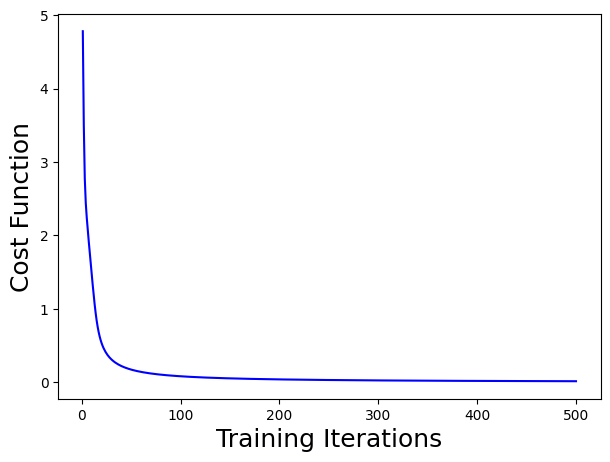

In [176]:
X = np.array([[-1,-1],[1,1]])
Y = np.array([[1,0],[0,1]])
Thetas= n_layer_init([2,2,2])
Thetas = two_layer_training(X, Y, Thetas, iters=500, rate=0.5)

In [177]:
def two_layer_training(X, Y, Thetas, iters=500, rate=0.5):
    cost_per_iter = []
    thetas_list = []
    for i in range(iters):
        A = forward_prop(X, Thetas)
        delta = output_delta(A[-1], Y)
        Thetas[-1] = weight_update(A[-2], delta, Thetas[-1], rate=rate)
        delta = hidden_delta(A[-2], delta, Thetas[-1])
        delta = delta[:, 1:]
        Thetas[-2] = weight_update(A[-3], delta, Thetas[-2], rate=rate)
        cost_per_iter.append(cost_function(A[-1], Y))
        thetas_list.append(Thetas.copy())
    return Thetas,thetas_list

In [284]:
scale = 0.4
start = -1
amount = 200
X = np.concatenate((
np.hstack((
    np.vstack(np.random.normal(start, scale, amount)),
    np.vstack(np.random.normal(start, scale, amount))
    )),
np.hstack((
    np.vstack(np.random.normal(start, scale, amount)),
    np.vstack(np.random.normal(start+2, scale, amount))
    )),
np.hstack((
    np.vstack(np.random.normal(start+2, scale, amount)),
    np.vstack(np.random.normal(start+2, scale, amount))
    )),
np.hstack((
    np.vstack(np.random.normal(start+2, scale, amount)),
    np.vstack(np.random.normal(start, scale, amount))
    )),
    ))
Y= np.vstack(([[1,0,0,0]]*amount,[[0,1,0,0]]*amount,[[0,0,1,0]]*amount,[[0,0,0,1]]*amount))
Thetas=n_layer_init([2,200, 4])


In [285]:
# X = np.array([[-1,-1],[1,1]])
# Y = np.array([[1,0],[0,1]])
# Thetas= n_layer_init([2,2,2])


number_of_datapoints = 100
line = np.vstack(np.linspace(-10,10,number_of_datapoints))
fakedata = np.array([[0,0]])
for datapoint in line:
    
    fakedata=np.vstack((fakedata,np.hstack((line,np.vstack(np.linspace(datapoint,datapoint,number_of_datapoints))))))

imlist = []
Thetas,l = two_layer_training(X, Y, Thetas, iters=500, rate=0.7)



for i in l:
    result = forward_prop(fakedata,i)

    idx0 = np.where(result[-1][:,0] > 0.80)
    idx1 = np.where(result[-1][:,1] > 0.80)
    idx2 = np.where(result[-1][:,2] > 0.80)
    idx3 = np.where(result[-1][:,3] > 0.80)

    plt.scatter(fakedata[idx0,0],fakedata[idx0,1],color="r",s=0.4)
    plt.scatter(fakedata[idx1,0],fakedata[idx1,1],color="b",s=0.4)
    plt.scatter(fakedata[idx2,0],fakedata[idx2,1],color="g",s=0.4)
    plt.scatter(fakedata[idx3,0],fakedata[idx3,1],color="y",s=0.4)

    buf = io.BytesIO()
    plt.savefig(buf)
    plt.close()
    imlist.append(np.array(Image.open(BytesIO(buf.getvalue())))[:,:,:-1])
plt.close()

C:\Users\Rex\AppData\Local\Temp\ipykernel_10848\896185846.py:5: RuntimeWarning: overflow encountered in exp
  return 1./(1 + np.exp(-X))
C:\Users\Rex\AppData\Local\Temp\ipykernel_10848\896185846.py:34: RuntimeWarning: divide by zero encountered in log
  return -np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))
C:\Users\Rex\AppData\Local\Temp\ipykernel_10848\896185846.py:34: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

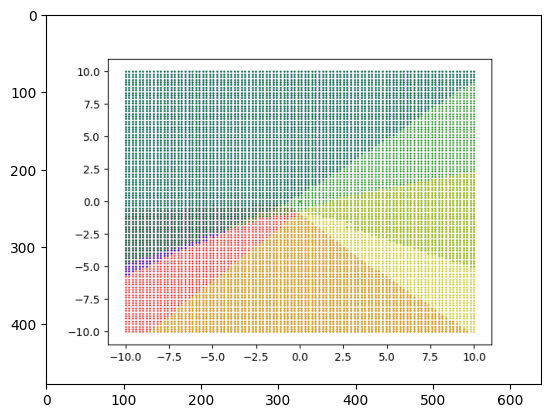

In [286]:
plt.imshow(imlist[6][:-2])
imlist[6]

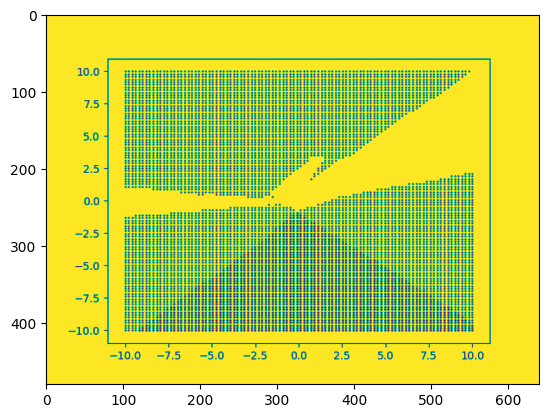

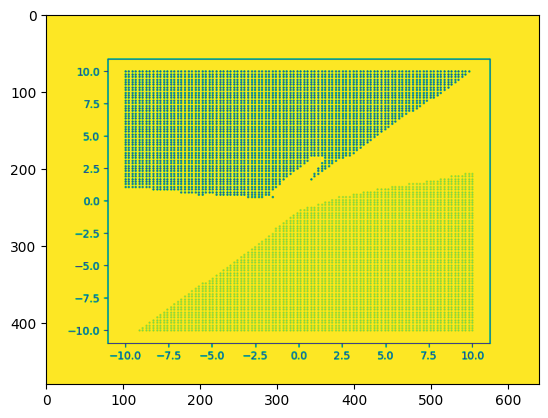

In [287]:
plt.imshow(imlist[5][:,:,2])
plt.show()
plt.imshow(imlist[5][:,:,0])
plt.show()

In [288]:
import cv2


frames = imlist
height, width, _ = frames[0].shape
out = cv2.VideoWriter('output.avi', cv2.VideoWriter_fourcc(*'DIVX'), 10, (width, height))
[out.write(f) for f in frames]
out.release()